<a href="https://colab.research.google.com/github/Pragu3704/Fibroblast-to-neuron-transcriptomics/blob/main/GP_miniproject_fibroblast_to_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Installing R enviornemnt on Python, switching to R and defining path to store R liberaries for easy use




In [ ]:
!apt-get install -y r-base

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.5.0-3.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
#Switching to R
%load_ext rpy2.ipython

In [ ]:
#Defining path to store R libraries
%%R
r_lib <- "/content/drive/MyDrive/Rlibs" #Define path for R library
dir.create(r_lib, showWarnings = FALSE, recursive = TRUE) #Creating directory
.libPaths(r_lib) #Setting library path
print(.libPaths()) #Confirmation


[1] "/content/drive/MyDrive/Rlibs"  "/usr/local/lib/R/site-library"
[3] "/usr/lib/R/site-library"       "/usr/lib/R/library"           


#Installing Bioconductor and it's associated libraries


In [ ]:
#Installing bioconductor
%%R
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")


Update all/some/none? [a/s/n]: n


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com
Bioconductor version 3.22 (BiocManager 1.30.25), R 4.5.0 (2025-04-11)
Old packages: 'generics'
In addition: Warning message:
package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'DESeq2' 


In [ ]:
#Defingin path to prestore libraries to prevent redownloading
%%R
.libPaths(c("/content/drive/MyDrive/Rlibs", .libPaths()))

print(.libPaths())

library(BiocManager)
BiocManager::install("edgeR")
BiocManager::install("GenomicFeatures")

[1] "/content/drive/MyDrive/Rlibs"  "/usr/local/lib/R/site-library"
[3] "/usr/lib/R/site-library"       "/usr/lib/R/library"           
Update all/some/none? [a/s/n]: n
Update all/some/none? [a/s/n]: n


Bioconductor version 3.22 (BiocManager 1.30.25), R 4.5.0 (2025-04-11)
'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com
Bioconductor version 3.22 (BiocManager 1.30.25), R 4.5.0 (2025-04-11)
Old packages: 'generics'
'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com
Bioconductor version 3.22 (BiocManager 1.30.25), R 4.5.0 (2025-04-11)
Old packages: 'generics'
In addition: Warning messages:
1: package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'edgeR' 
2: package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'GenomicFeatures' 


#Reading both GP.csv and metadata.csv and performing QC

In [ ]:
#Reading .csv files of counts and metadata
%%R

count_path <- "/content/drive/My Drive/6th sem assignments_Pragathi_PES1UG22BT038/GP_assignments_Pragathi_PES1UG22BT038/GP.csv"
meta_path <- "/content/drive/My Drive/6th sem assignments_Pragathi_PES1UG22BT038/GP_assignments_Pragathi_PES1UG22BT038/metadata.csv"

# Read into R
counts <- read.csv(count_path, row.names=1)
meta <- read.csv(meta_path, row.names=1)


str(counts)
str(meta)

'data.frame':	78932 obs. of  7 variables:
 $ ERR3322433_24d       : int  636 2 677 252 68 2 713 1300 526 1303 ...
 $ ERR3322431_18d       : int  637 0 1181 227 47 0 430 2315 679 1015 ...
 $ ERR3322430_12d       : int  457 0 985 248 62 0 342 2049 680 1582 ...
 $ ERR3322435_6d        : int  722 0 973 246 121 1 312 2911 471 1704 ...
 $ ERR3322434_3d        : int  632 0 695 172 78 0 239 2731 280 1009 ...
 $ ERR3322432_1d        : int  318 0 1729 294 87 2 166 1342 479 1453 ...
 $ ERR3322436_Fibroblast: int  1204 0 795 141 64 1 66 2194 264 266 ...
'data.frame':	7 obs. of  2 variables:
 $ day      : int  24 18 12 6 3 1 0
 $ condition: chr  "neuron" "neuron" "neuron" "neuron" ...


In [ ]:
#Quality control to see if column names of count are matching row names of meta
%%R
all(colnames(counts) %in% rownames(meta))

[1] TRUE


In [ ]:
#Chekcing order of row and column names
%%R
all(colnames(counts)==rownames(meta))

[1] TRUE


#Performing differential expression analysis

In [ ]:
%%R
library(DESeq2)


Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: generics

Attaching package: ‘generics’

The following objects are masked from ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union


Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, saveRDS, table, tapply, unique,
    unsplit, which.max, which.min


Attaching package: ‘S4Vectors’

The following object is masked from ‘package:utils’:

    findMatches

The following object

In [ ]:
%%R
meta$day_factor <- factor(meta$day)
dds <- DESeqDataSetFromMatrix(countData = counts,
                              colData = meta,
                              design = ~ day_factor)


In [ ]:
%%R
dds

class: DESeqDataSet 
dim: 78932 7 
metadata(1): version
assays(1): counts
rownames(78932): ENSG00000000003 ENSG00000000005 ... ENSG00000310556
  ENSG00000310557
rowData names(0):
colnames(7): ERR3322433_24d ERR3322431_18d ... ERR3322432_1d
  ERR3322436_Fibroblast
colData names(3): day condition day_factor


In [ ]:
#Leaky expression of gene : Low expression of mRNA in a place it's not supposed to express. So remove low read count genes
%%R
# Filter genes: keep those with >=10 counts in at least 2 samples
keep <- rowSums(counts >= 10) >= 2
dds <- dds[keep, ]
cat("Number of genes kept:", sum(keep), "\n")
cat("Total genes before filtering:", nrow(counts), "\n")

Number of genes kept: 18121 
Total genes before filtering: 78932 


In [ ]:
%%R
# Ensure condition is a factor
meta$condition <- factor(meta$condition)

# Set fibroblast as the reference level
meta$condition <- relevel(meta$condition, ref = "fibroblast")

In [ ]:
#Convert rows to factors for easy comparision
%%R
meta$day_factor <- factor(meta$day)
dds <- DESeqDataSetFromMatrix(countData = counts,
                              colData = meta,
                              design = ~ condition)

In [ ]:
#DIff expression
%%R
deg <- DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [ ]:
#Store results in deg variable
%%R
res <- results(deg)

In [ ]:
#Save DEGs in a .csv file
%%R
write.csv(res, file = "/content/drive/My Drive/6th sem assignments_Pragathi_PES1UG22BT038/GP_assignments_Pragathi_PES1UG22BT038/degs.csv")

In [ ]:
#Summary stats
%%R
summary(res)   #p value <0.1


out of 40855 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 3150, 7.7%
LFC < 0 (down)     : 1737, 4.3%
outliers [1]       : 120, 0.29%
low counts [2]     : 22595, 55%
(mean count < 6)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [ ]:
#Regenerate results fo p <0.05
%%R
res0.05 <- results(deg, alpha = 0.05)

In [ ]:
%%R
summary(res0.05)


out of 40855 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 2298, 5.6%
LFC < 0 (down)     : 1130, 2.8%
outliers [1]       : 120, 0.29%
low counts [2]     : 24092, 59%
(mean count < 9)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [ ]:
%%R
vsd <- vst(dds, blind = FALSE)

#Adding gene symbol column to degs.csv file

In [ ]:
%%R
BiocManager::install("AnnotationDbi")

Update all/some/none? [a/s/n]: n


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com
Bioconductor version 3.22 (BiocManager 1.30.25), R 4.5.0 (2025-04-11)
Old packages: 'generics'
In addition: Warning message:
package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'AnnotationDbi' 


In [ ]:
#Ensembl Gene id to gene names
%%R
res0.05.df <- as.data.frame(res0.05)
str(res0.05.df)

'data.frame':	78932 obs. of  6 variables:
 $ baseMean      : num  711.662 0.264 976.572 217.027 74.551 ...
 $ log2FoldChange: num  -1.7326 0.2808 -0.3123 0.0722 -0.4074 ...
 $ lfcSE         : num  0.612 5.398 0.536 0.324 0.609 ...
 $ stat          : num  -2.83 0.052 -0.583 0.223 -0.669 ...
 $ pvalue        : num  0.00465 0.95851 0.56015 0.82391 0.50377 ...
 $ padj          : num  0.0294 NA 0.7177 0.8968 0.6735 ...


In [ ]:
#Install reference database for naming genes
%%R
if (!requireNamespace("org.Hs.eg.db", quietly = TRUE)) {
    BiocManager::install("org.Hs.eg.db")
}
    library("org.Hs.eg.db")


Loading required package: AnnotationDbi


In [ ]:
#Adding column with gene symbols

%%R
res0.05.df$ENSEMBL <- rownames(res0.05.df)

# Map ENSEMBL IDs to gene symbols
res0.05.df$Symbol <- mapIds(
  org.Hs.eg.db,
  keys = res0.05.df$ENSEMBL,
  column = "SYMBOL",
  keytype = "ENSEMBL",
  multiVals = "first"
)

# Reorder columns
res0.05.df <- res0.05.df[, c("ENSEMBL", "Symbol", setdiff(colnames(res0.05.df), c("ENSEMBL", "Symbol")))]

'select()' returned 1:many mapping between keys and columns


In [ ]:
#Observing changed dataframe
%%R
str(res0.05.df)

'data.frame':	78932 obs. of  8 variables:
 $ ENSEMBL       : chr  "ENSG00000000003" "ENSG00000000005" "ENSG00000000419" "ENSG00000000457" ...
 $ Symbol        : chr  "TSPAN6" "TNMD" "DPM1" "SCYL3" ...
 $ baseMean      : num  711.662 0.264 976.572 217.027 74.551 ...
 $ log2FoldChange: num  -1.7326 0.2808 -0.3123 0.0722 -0.4074 ...
 $ lfcSE         : num  0.612 5.398 0.536 0.324 0.609 ...
 $ stat          : num  -2.83 0.052 -0.583 0.223 -0.669 ...
 $ pvalue        : num  0.00465 0.95851 0.56015 0.82391 0.50377 ...
 $ padj          : num  0.0294 NA 0.7177 0.8968 0.6735 ...


In [ ]:
#Saving deg csv file with Symbols column
%%R
write.csv(res0.05.df, file = "/content/drive/My Drive/6th sem assignments_Pragathi_PES1UG22BT038/GP_assignments_Pragathi_PES1UG22BT038/final_test.csv")

In [ ]:
#Removing extra ENSEMBL column
%%R
res0.05.df$ENSEMBL <- NULL
write.csv(res0.05.df, file = "/content/drive/My Drive/6th sem assignments_Pragathi_PES1UG22BT038/GP_assignments_Pragathi_PES1UG22BT038/final_test.csv", row.names = TRUE)

#Building PCA plots

using ntop=500 top features by variance


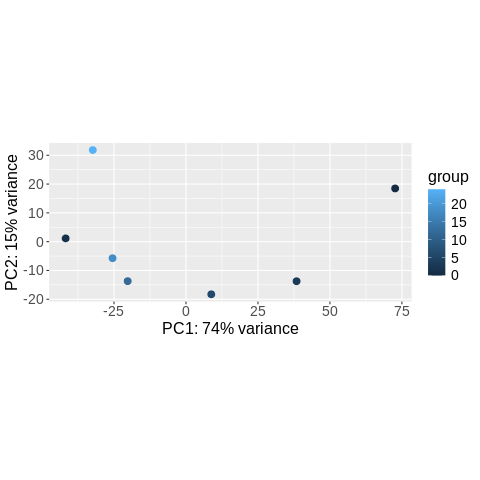

In [ ]:
#Building PCA Plot taking day as interval group
%%R
library(ggplot2)
vsd <- vst(deg, blind = FALSE)
plotPCA(vsd, intgroup = "day") +
  theme(
    axis.text.x = element_text(size = 14),   # Increase font size for x-axis labels
    axis.text.y = element_text(size = 14),   # Increase font size for y-axis labels
    axis.title.x = element_text(size = 16),  # Increase font size for x-axis title
    axis.title.y = element_text(size = 16),  # Increase font size for y-axis title
    legend.text = element_text(size = 14),   # Increase font size for legend text
    legend.title = element_text(size = 16)   # Increase font size for legend title
  )

In [ ]:
%%R
install.packages("pheatmap")

Installing package into ‘/content/drive/MyDrive/Rlibs’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/pheatmap_1.0.12.tar.gz'
Content type 'application/x-gzip' length 15071 bytes (14 KB)
downloaded 14 KB


The downloaded source packages are in
	‘/tmp/RtmpCikQoQ/downloaded_packages’


using ntop=500 top features by variance


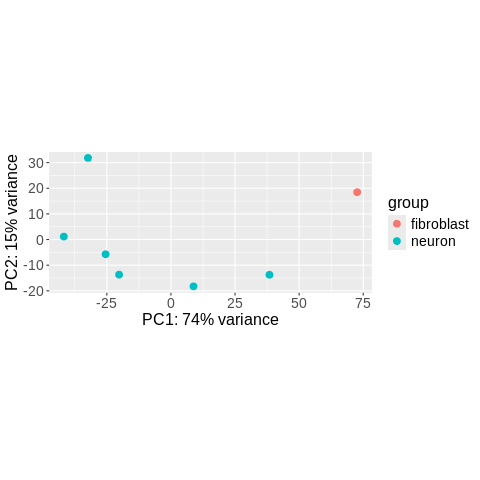

In [ ]:
#Building PCA Plot taking condition as interval group
%%R
library(ggplot2)
vsd <- vst(deg, blind = FALSE)
plotPCA(vsd, intgroup = "condition") +
  theme(
    axis.text.x = element_text(size = 14),   # Increase font size for x-axis labels
    axis.text.y = element_text(size = 14),   # Increase font size for y-axis labels
    axis.title.x = element_text(size = 16),  # Increase font size for x-axis title
    axis.title.y = element_text(size = 16),  # Increase font size for y-axis title
    legend.text = element_text(size = 14),   # Increase font size for legend text
    legend.title = element_text(size = 16)   # Increase font size for legend title
  )

# Seeing distance between samples in the PCA space using heatmaps

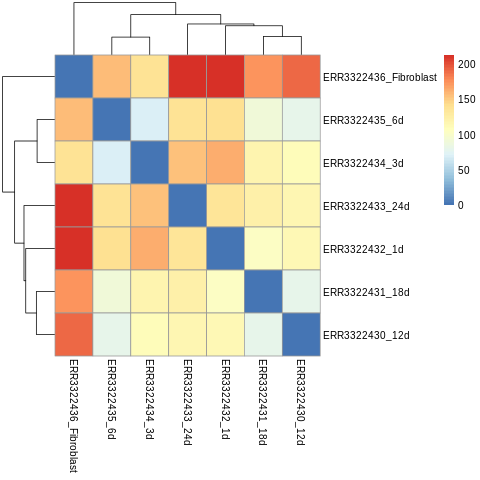

In [ ]:
%%R
#Add sample distance
sampleDists <- dist(t(assay(vsd)))
sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- colnames(vsd)
pheatmap::pheatmap(sampleDistMatrix)

#Size estimation: to remove biases

In [ ]:
%%R
sizeFactors(deg)

       ERR3322433_24d        ERR3322431_18d        ERR3322430_12d 
            1.0825685             1.0369194             1.2821276 
        ERR3322435_6d         ERR3322434_3d         ERR3322432_1d 
            1.1718687             0.8281179             1.1828827 
ERR3322436_Fibroblast 
            0.6782107 


#Disperssion plot



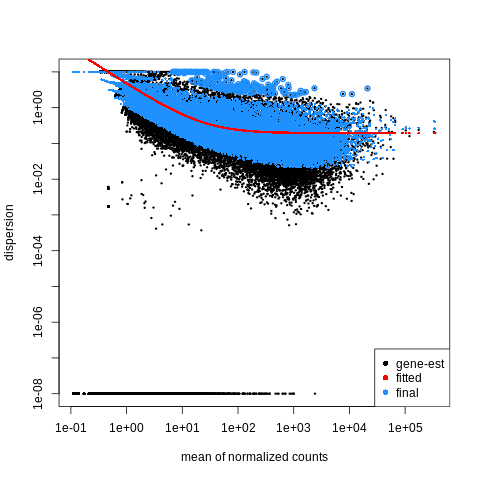

In [ ]:
%%R
plotDispEsts(deg)

#Moving Averages plot

In [ ]:
%%R
install.packages("dplyr")

Installing package into ‘/content/drive/MyDrive/Rlibs’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/dplyr_1.1.4.tar.gz'
Content type 'application/x-gzip' length 1207521 bytes (1.2 MB)
downloaded 1.2 MB


The downloaded source packages are in
	‘/tmp/RtmpCikQoQ/downloaded_packages’


In [ ]:
%%R
install.packages("ggplot2")
install.packages("tidyverse")

Installing package into ‘/content/drive/MyDrive/Rlibs’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/ggplot2_3.5.2.tar.gz'
Content type 'application/x-gzip' length 3580451 bytes (3.4 MB)
downloaded 3.4 MB


The downloaded source packages are in
	‘/tmp/RtmpCikQoQ/downloaded_packages’
Installing package into ‘/content/drive/MyDrive/Rlibs’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/tidyverse_2.0.0.tar.gz'
Content type 'application/x-gzip' length 704618 bytes (688 KB)
downloaded 688 KB


The downloaded source packages are in
	‘/tmp/RtmpCikQoQ/downloaded_packages’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::%within%() masks IRanges::%within%()
✖ dplyr::collapse()     masks IRanges::collapse()
✖ dplyr::combine()      masks Biobase::combine(), BiocGenerics::combine()
✖ dplyr::count()        masks matrixStats::count()
✖ dplyr::desc()         masks IRanges::desc()
✖ tidyr::expand()       masks S4Vectors::expand()
✖ dplyr::filter()       masks stats::filter()
✖ dplyr::first()        masks S4Vectors::first()
✖ dplyr::lag()          masks stats::lag()
✖ ggplot2::Position()   masks BiocGenerics::Position(), base::Position()
✖ purrr::reduce()       masks GenomicRanges::reduce(), IRanges::reduce()
✖ dplyr::rename()       masks S4Vectors::rename()
✖ lubridate::second()   masks S4Vectors:


Attaching package: ‘dplyr’

The following object is masked from ‘package:AnnotationDbi’:

    select

The following object is masked from ‘package:Biobase’:

    combine

The following object is masked from ‘package:matrixStats’:

    count

The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union

The following object is masked from ‘package:GenomeInfoDb’:

    intersect

The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union

The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union

The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, setequal, union

The following object is masked from ‘package:generics’:

    explain

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



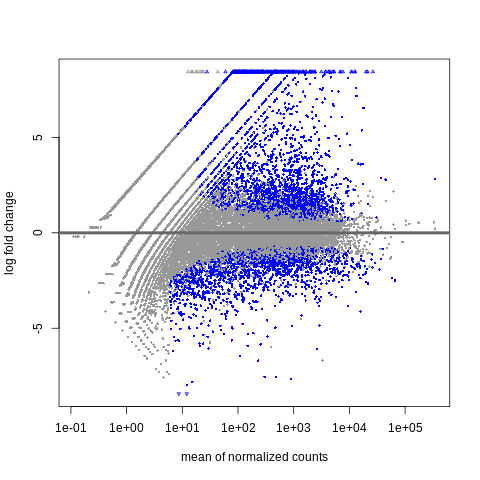

In [ ]:
#MA plot
%%R
library(dplyr)
library(ggplot2)
library(tidyverse)
plotMA(deg)

#Understanding 30 best genes expressed

In [ ]:
#getting idea about 30 best genes
%%R
best_genes <- res0.05.df %>%
 arrange(padj) %>%
 head(30)
best_genes


                  Symbol   baseMean log2FoldChange     lfcSE      stat
ENSG00000169116    PARM1  6970.3808       9.844038 0.7512827 13.102974
ENSG00000090932     DLL3  3639.7103       7.030564 0.6291320 11.175023
ENSG00000137142  IGFBPL1  6788.4449       8.931171 0.7991672 11.175598
ENSG00000167680   SEMA6B  2415.5411       8.899840 0.8076368 11.019606
ENSG00000163273     NPPC  5307.6621       8.865659 0.8067529 10.989311
ENSG00000173376     NDNF  4352.7383       9.749689 0.9433005 10.335720
ENSG00000110987    BCL7A  1456.7393       3.887989 0.3782312 10.279398
ENSG00000115468    EFHD1   121.1256      -4.770981 0.4780905 -9.979241
ENSG00000198729 PPP1R14C  1320.8934       6.857708 0.6902500  9.935108
ENSG00000108387  SEPTIN4  2176.7454       5.991599 0.6076590  9.860135
ENSG00000117461   PIK3R3  2113.7143       3.399934 0.3466017  9.809340
ENSG00000061337    LZTS1   998.5709       5.450379 0.5765969  9.452666
ENSG00000141540    TTYH2  1806.8847       6.085699 0.6449116  9.436485
ENSG00

In [ ]:
#Saving csv of 30 best genes
%%R
write.csv(best_genes, file = "/content/drive/My Drive/6th sem assignments_Pragathi_PES1UG22BT038/GP_assignments_Pragathi_PES1UG22BT038/best_genes.csv")

#Plotting Volcano plot for 30 best genes

In [ ]:
#Volcano plot
%%R
vol <- res0.05.df %>%
 filter(!is.na(padj))

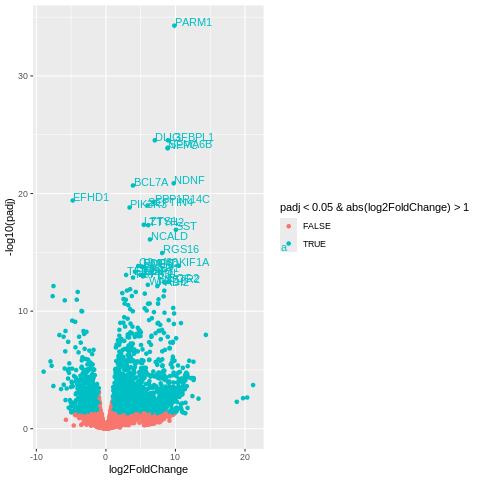

In [ ]:
%%R
# Set plot size in the notebook (for Colab / Jupyter)
options(repr.plot.width = 16, repr.plot.height = 14)

# Load ggplot2 library for plotting
library(ggplot2)


vsd <- vst(deg, blind = FALSE)
ggplot(vol, aes(x = log2FoldChange, y = -log10(padj), color=padj <0.05 & abs(log2FoldChange)>1)) + geom_point()+geom_text(data=best_genes,aes(label=Symbol),hjust=-0.02,vjust=0.05)

#Heatmap for visualising relationship between 30 best genes

'select()' returned 1:many mapping between keys and columns


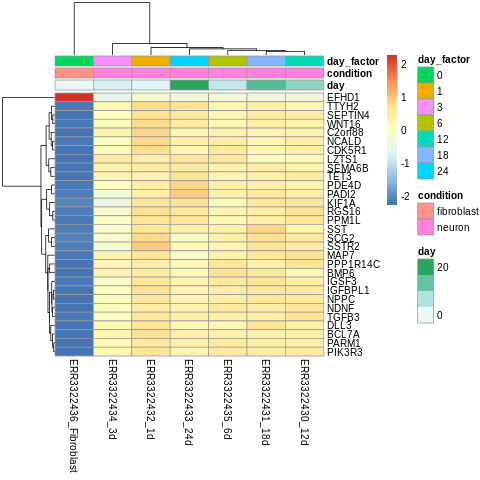

In [ ]:
%%R
library(pheatmap)
library(dplyr)
library(org.Hs.eg.db)
library(AnnotationDbi)

# Clean ENSEMBL IDs
rownames(vsd) <- gsub("\\..*", "", rownames(vsd))

# Recreate res0.05.df with cleaned ENSEMBL IDs
res0.05.df <- as.data.frame(res0.05)
res0.05.df$ENSEMBL <- rownames(res0.05.df)
res0.05.df <- res0.05.df[, c("ENSEMBL", setdiff(colnames(res0.05.df), "ENSEMBL"))]

# Add gene symbols using org.Hs.eg.db
symbols <- mapIds(org.Hs.eg.db,
                  keys = res0.05.df$ENSEMBL,
                  column = "SYMBOL",
                  keytype = "ENSEMBL",
                  multiVals = "first")
res0.05.df$Symbol <- as.character(symbols[res0.05.df$ENSEMBL])
res0.05.df$Symbol[is.na(res0.05.df$Symbol)] <- res0.05.df$ENSEMBL[is.na(res0.05.df$Symbol)]

# Select top 30 genes
top30 <- res0.05.df %>% arrange(padj) %>% head(30)
top30_expr <- assay(vsd)[top30$ENSEMBL, ]

# Use gene symbols as rownames (ensure uniqueness)
rownames(top30_expr) <- make.unique(top30$Symbol)

# Plot heatmap
pheatmap(top30_expr, scale = "row", annotation_col = meta)


#Observing expression levels of 30 best genes over period of time: from fibroblasts to 24th day of neuronal maturation

'select()' returned 1:many mapping between keys and columns


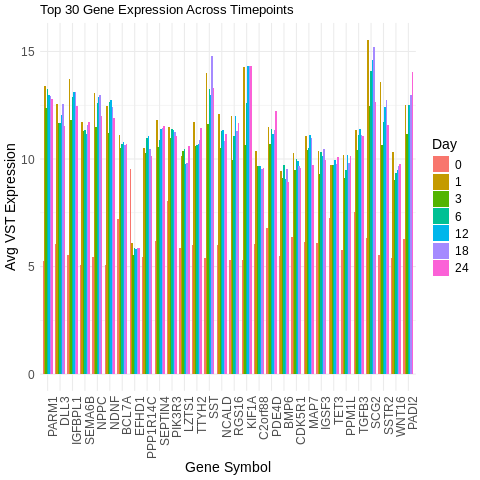

In [ ]:
%%R

options(repr.plot.width = 16, repr.plot.height = 12)  # Increase width and height for a larger plot

# Load required libraries
library(reshape2)
library(ggplot2)
library(dplyr)
library(org.Hs.eg.db)
library(AnnotationDbi)

# Clean ENSEMBL IDs (remove version numbers)
res0.05.df$ENSEMBL <- gsub("\\..*", "", rownames(res0.05.df))
rownames(vsd) <- gsub("\\..*", "", rownames(vsd))

# Add gene symbols
symbols <- mapIds(org.Hs.eg.db,
                  keys = res0.05.df$ENSEMBL,
                  column = "SYMBOL",
                  keytype = "ENSEMBL",
                  multiVals = "first")
res0.05.df$Symbol <- as.character(symbols[res0.05.df$ENSEMBL])
res0.05.df$Symbol[is.na(res0.05.df$Symbol)] <- res0.05.df$ENSEMBL[is.na(res0.05.df$Symbol)]

# Get top 30 genes
top30 <- res0.05.df %>% arrange(padj) %>% head(30)
top30_expr <- assay(vsd)[top30$ENSEMBL, ]
rownames(top30_expr) <- make.unique(top30$Symbol)

# Convert expression matrix to long format
long_df <- melt(top30_expr)
colnames(long_df) <- c("Gene", "Sample", "Expression")

# Add time info
long_df$Time <- meta[as.character(long_df$Sample), "day"]

# Average expression per gene per timepoint
summary_df <- long_df %>%
  group_by(Gene, Time) %>%
  summarise(AvgExpr = mean(Expression), .groups = "drop")

# Final grouped barplot
ggplot(summary_df, aes(x = Gene, y = AvgExpr, fill = as.factor(Time))) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.8)) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 90, hjust = 1, size = 12),  # Increased axis text size for better readability
    axis.text.y = element_text(size = 12),   # Increased font size for y-axis labels
    axis.title.x = element_text(size = 14),  # Increased font size for x-axis title
    axis.title.y = element_text(size = 14),  # Increased font size for y-axis title
    legend.text = element_text(size = 12),   # Increased font size for legend text
    legend.title = element_text(size = 14)   # Increased font size for legend title
  ) +
  labs(
    title = "Top 30 Gene Expression Across Timepoints",
    x = "Gene Symbol", y = "Avg VST Expression", fill = "Day"
  )


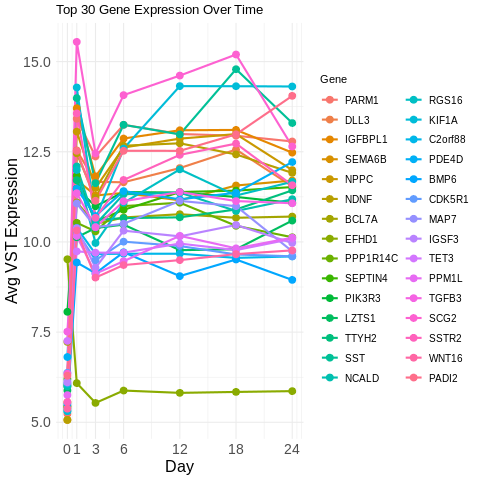

In [ ]:
%%R
# Set plot size in the notebook (for Colab / Jupyter)
options(repr.plot.width = 16, repr.plot.height = 12)  # Increase width and height for a larger plot

# Load ggplot2 library for plotting
library(ggplot2)

# Line plot version of expression trends over time for top 30 genes
ggplot(summary_df, aes(x = Time, y = AvgExpr, group = Gene, color = Gene)) +
  geom_line(linewidth = 1) +    # Line width increased for better visibility
  geom_point(size = 3) +        # Point size increased for better visibility
  theme_minimal() +
  scale_x_continuous(breaks = sort(unique(summary_df$Time))) +
  labs(title = "Top 30 Gene Expression Over Time",
       x = "Day", y = "Avg VST Expression", color = "Gene") +
  theme(
    legend.position = "right",  # Keep legend on the right
    legend.key.size = unit(0.7, "cm"),  # Increase legend key size
    legend.text = element_text(size = 10),  # Increase legend text size for clarity
    axis.text.x = element_text(size = 14),  # Increase font size for x-axis labels
    axis.text.y = element_text(size = 14),  # Increase font size for y-axis labels
    axis.title.x = element_text(size = 16),  # Increase font size for x-axis title
    axis.title.y = element_text(size = 16)   # Increase font size for y-axis title
  )


#GO enrichment analysis

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.



clusterProfiler v4.17.0 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

S Xu, E Hu, Y Cai, Z Xie, X Luo, L Zhan, W Tang, Q Wang, B Liu, R Wang,
W Xie, T Wu, L Xie, G Yu. Using clusterProfiler to characterize
multiomics data. Nature Protocols. 2024, 19(11):3292-3320

Attaching package: ‘clusterProfiler’

The following object is masked from ‘package:purrr’:

    simplify

The following object is masked from ‘package:AnnotationDbi’:

    select

The following object is masked from ‘package:IRanges’:

    slice

The following object is masked from ‘package:S4Vectors’:

    rename

The following object is masked from ‘package:stats’:

    filter

enrichplot v1.29.1 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan,
X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal
enrichment tool for interpreting omics data. The Innovation. 2021,
2(3):100141
'

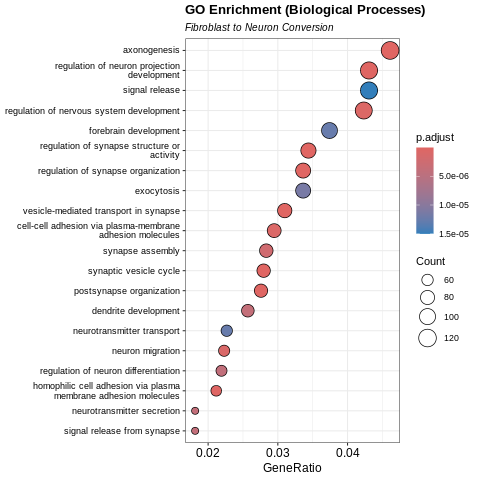

In [ ]:
%%R
library(clusterProfiler)
library(org.Hs.eg.db)
library(ggplot2)
library(enrichplot)

# Convert gene symbols (or ENSEMBL IDs) to Entrez IDs
# Assumes top30 DEGs from fibroblast to neuron conversion
genes <- na.omit(res0.05.df$ENSEMBL[res0.05.df$padj < 0.05])
genes <- gsub("\\..*", "", genes)  # remove version if present

entrez <- bitr(genes, fromType = "ENSEMBL", toType = "ENTREZID", OrgDb = org.Hs.eg.db)

# Enrichment using Biological Process
ego <- enrichGO(gene = entrez$ENTREZID,
                OrgDb = org.Hs.eg.db,
                keyType = "ENTREZID",
                ont = "BP",  # Biological Process
                pAdjustMethod = "BH",
                pvalueCutoff = 0.05,
                qvalueCutoff = 0.2,
                readable = TRUE)

# Plot: Y-axis cleaned, wrapped, and readable
dotplot(ego, showCategory = 20) +
  scale_y_discrete(labels = function(x) stringr::str_wrap(x, width = 40)) +
  labs(title = "GO Enrichment (Biological Processes)",
       subtitle = "Fibroblast to Neuron Conversion") +
  theme(axis.text.y = element_text(size = 9),
        plot.title = element_text(face = "bold"),
        plot.subtitle = element_text(size = 10, face = "italic"))


#KEGG Pathway enrichment for top 1000 genes

In [ ]:
%%R
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("clusterProfiler")


Update all/some/none? [a/s/n]: n


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com
Bioconductor version 3.22 (BiocManager 1.30.25), R 4.5.0 (2025-04-11)
Old packages: 'generics'
In addition: Warning message:
package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'clusterProfiler' 


In [ ]:
%%R
# Load required libraries
library(clusterProfiler)
library(org.Hs.eg.db)
library(dplyr)

# Clean ENSEMBL IDs if needed
rownames(vsd) <- gsub("\\..*", "", rownames(vsd))

# Prepare DE dataframe (if not already done)
res0.05.df <- as.data.frame(res0.05)
res0.05.df$ENSEMBL <- rownames(res0.05.df)
res0.05.df <- res0.05.df[, c("ENSEMBL", setdiff(colnames(res0.05.df), "ENSEMBL"))]

# Map ENSEMBL to SYMBOL
symbols <- mapIds(org.Hs.eg.db,
                  keys = res0.05.df$ENSEMBL,
                  column = "SYMBOL",
                  keytype = "ENSEMBL",
                  multiVals = "first")
res0.05.df$Symbol <- as.character(symbols[res0.05.df$ENSEMBL])
res0.05.df$Symbol[is.na(res0.05.df$Symbol)] <- res0.05.df$ENSEMBL[is.na(res0.05.df$Symbol)]

# Select top 30 by padj
top1000 <- res0.05.df %>% arrange(padj) %>% head(1000)


'select()' returned 1:many mapping between keys and columns


'select()' returned 1:1 mapping between keys and columns
In addition: Warning message:
In bitr(top1000$Symbol, fromType = "SYMBOL", toType = "ENTREZID",  :
  2.5% of input gene IDs are fail to map...


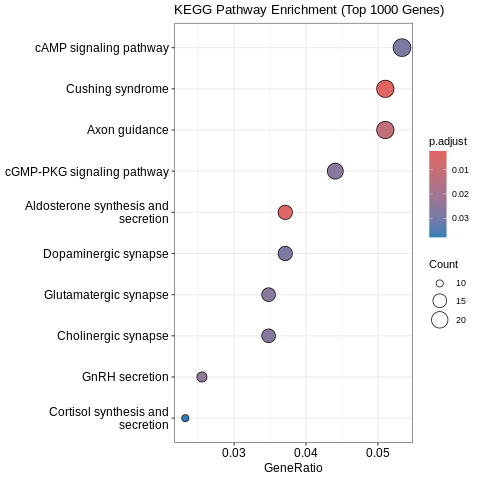

In [ ]:
%%R
# Convert to Entrez IDs
entrez_ids <- bitr(top1000$Symbol,
                   fromType = "SYMBOL",
                   toType = "ENTREZID",
                   OrgDb = org.Hs.eg.db)

# KEGG enrichment
kegg_result <- enrichKEGG(gene = entrez_ids$ENTREZID,
                          organism = 'hsa',
                          pvalueCutoff = 0.05)

# Plot
dotplot(kegg_result, showCategory = 10, title = "KEGG Pathway Enrichment (Top 1000 Genes)")


#GSEA

DOSE v4.3.0 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an
R/Bioconductor package for Disease Ontology Semantic and Enrichment
analysis. Bioinformatics. 2015, 31(4):608-609
'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns
using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).

preparing geneSet collections...
GSEA analysis...
leading edge analysis...
done...
In addition: Warning messages:
1: In .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize,  :
  We do not recommend using nPerm parameter incurrent and future releases
2: In fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize,  :
  You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.
3: In p

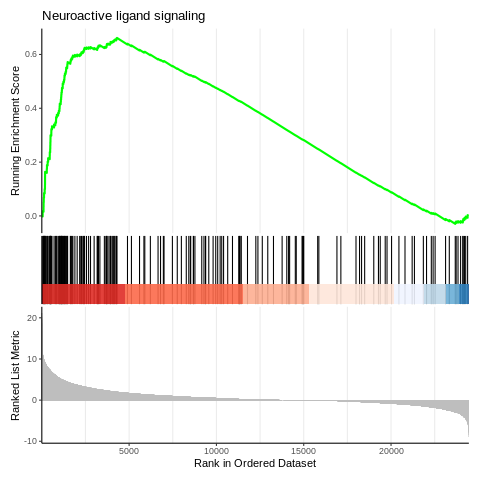

In [ ]:
%%R
# Load required libraries
library(clusterProfiler)
library(org.Hs.eg.db)
library(enrichplot)
library(DOSE)

#Prepare ranked gene list from DE results
# Ensure res0.05.df has SYMBOL and log2FoldChange
res0.05.df$ENSEMBL <- gsub("\\..*", "", res0.05.df$ENSEMBL)

symbols <- mapIds(org.Hs.eg.db,
                  keys = res0.05.df$ENSEMBL,
                  column = "SYMBOL",
                  keytype = "ENSEMBL",
                  multiVals = "first")
res0.05.df$Symbol <- as.character(symbols[res0.05.df$ENSEMBL])
res0.05.df <- res0.05.df[!is.na(res0.05.df$Symbol), ]

# Create named vector: names = SYMBOL, values = log2FoldChange
gene_list <- res0.05.df$log2FoldChange
names(gene_list) <- res0.05.df$Symbol

# Remove NA or duplicated names, sort in decreasing order
gene_list <- gene_list[!is.na(gene_list)]
gene_list <- sort(gene_list, decreasing = TRUE)
gene_list <- gene_list[!duplicated(names(gene_list))]

#Map SYMBOL to ENTREZ
gene_list_entrez <- bitr(names(gene_list),
                         fromType = "SYMBOL",
                         toType = "ENTREZID",
                         OrgDb = org.Hs.eg.db)

#Reconstruct gene list with ENTREZ IDs
gene_list <- gene_list[gene_list_entrez$SYMBOL]
names(gene_list) <- gene_list_entrez$ENTREZID

#Run GSEA
gsea_result <- gseKEGG(geneList = gene_list,
                       organism = 'hsa',
                       nPerm = 1000,
                       minGSSize = 10,
                       pvalueCutoff = 0.05)

#Plot
gseaplot2(gsea_result, geneSetID = 1, title = gsea_result$Description[1])

